In [1]:
import torch
import numpy as np
from functorch.dim import Tensor

np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
t_ones = torch.ones(2,3)
print(t_ones.shape)
t_ones

torch.Size([2, 3])


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.4936, 0.4539, 0.5863],
        [0.2031, 0.6899, 0.2898]])


In [6]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [7]:
t = torch.rand(3,5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, '--->', t_tr.shape)

torch.Size([3, 5]) ---> torch.Size([5, 3])


In [8]:
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
print(t_reshape)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [9]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t,2) #take out 2nd dimension
print(t.shape, '-->',t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [10]:
t1 = 2 * torch.rand(5,2) - 1 #uniform distribution
t2 = torch.normal(mean=0, std=1,size=(5,2)) #normal distribution
t3 = torch.multiply(t1, t2) #elementwise product
print(t3)

tensor([[ 0.3087,  1.4848],
        [ 0.0446, -0.2088],
        [ 0.5379,  0.0702],
        [ 0.1149, -0.0714],
        [-0.3491,  0.3353]])


In [11]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([0.3852, 0.4432])


In [12]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
t6 = torch.matmul(torch.transpose(t1,0,1), t2)

print(t5, t6)

tensor([[ 1.7935, -0.3275, -0.1124, -0.3096, -0.7763],
        [ 0.4036, -0.1642,  0.6832,  0.4543, -1.1231],
        [ 0.0212, -0.0817,  0.6081,  0.4470, -0.8249],
        [ 1.6229, -0.3523,  0.3360,  0.0435, -1.2883],
        [-0.9851,  0.1379,  0.3906,  0.4133, -0.0138]]) tensor([[ 0.6571, -1.7533],
        [ 0.3717,  1.6101]])


In [13]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.8486, 0.9336, 0.8018, 0.9126, 0.6675])


In [14]:
t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.5670, 0.1607, 0.6981, 0.2289, 0.8586, 0.9318])


[array([0.567, 0.161], dtype=float32),
 array([0.698, 0.229], dtype=float32),
 array([0.859, 0.932], dtype=float32)]

In [16]:
t = torch.rand(5)
t_splits = torch.split(t, split_size_or_sections=[3,2])
[item.numpy() for item in t_splits]


[array([0.798, 0.899, 0.188], dtype=float32),
 array([0.963, 0.351], dtype=float32)]

In [17]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [18]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [20]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [24]:
# now we batchify
data_loader = DataLoader(t, batch_size = 3, drop_last=False)
for i, batch in enumerate(data_loader):
    print('batch ' + str(i) + ':' + str(batch))

batch 0:tensor([0., 1., 2.])
batch 1:tensor([3., 4., 5.])


In [25]:
t_x = torch.rand([4,3], dtype=torch.float32)
t_y = torch.arange(4)

# we combined these "features" with "labels"
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [27]:

joint_dataset = JointDataset(t_x, t_y)

# or just use directly:

from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])
    
    

  x:  tensor([0.3337, 0.6976, 0.1545])   y:  tensor(0)
  x:  tensor([0.4781, 0.0189, 0.1674])   y:  tensor(1)
  x:  tensor([0.8968, 0.2219, 0.3415])   y:  tensor(2)
  x:  tensor([0.7967, 0.4901, 0.9424])   y:  tensor(3)


In [28]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.7967, 0.4901, 0.9424],
        [0.8968, 0.2219, 0.3415]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.3337, 0.6976, 0.1545],
        [0.4781, 0.0189, 0.1674]]) 
         y: tensor([0, 1])
epoch 1
batch 1: x: tensor([[0.8968, 0.2219, 0.3415],
        [0.7967, 0.4901, 0.9424]]) 
         y: tensor([2, 3])
batch 2: x: tensor([[0.4781, 0.0189, 0.1674],
        [0.3337, 0.6976, 0.1545]]) 
         y: tensor([1, 0])
epoch 2
batch 1: x: tensor([[0.7967, 0.4901, 0.9424],
        [0.4781, 0.0189, 0.1674]]) 
         y: tensor([3, 1])
batch 2: x: tensor([[0.8968, 0.2219, 0.3415],
        [0.3337, 0.6976, 0.1545]]) 
         y: tensor([2, 0])


In [29]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


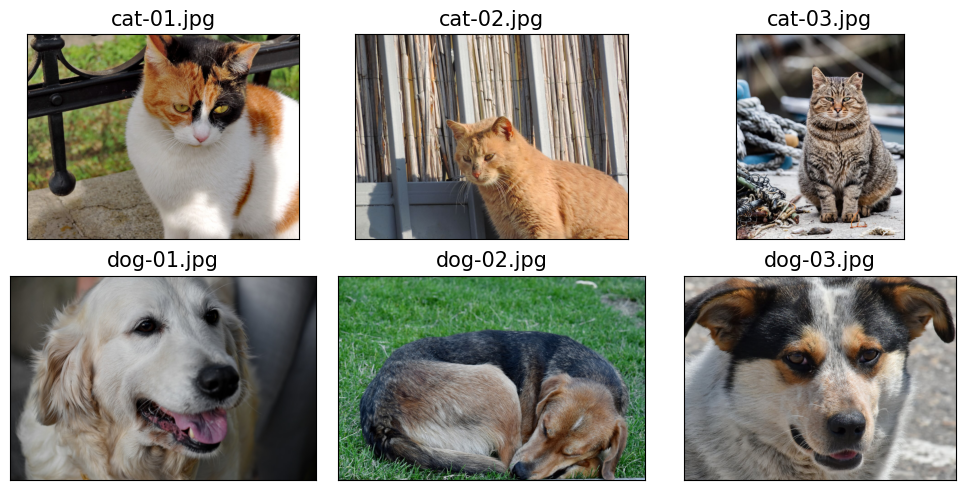

In [30]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()

In [31]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [32]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [36]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), antialias=True),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00055503234..1.0000002].


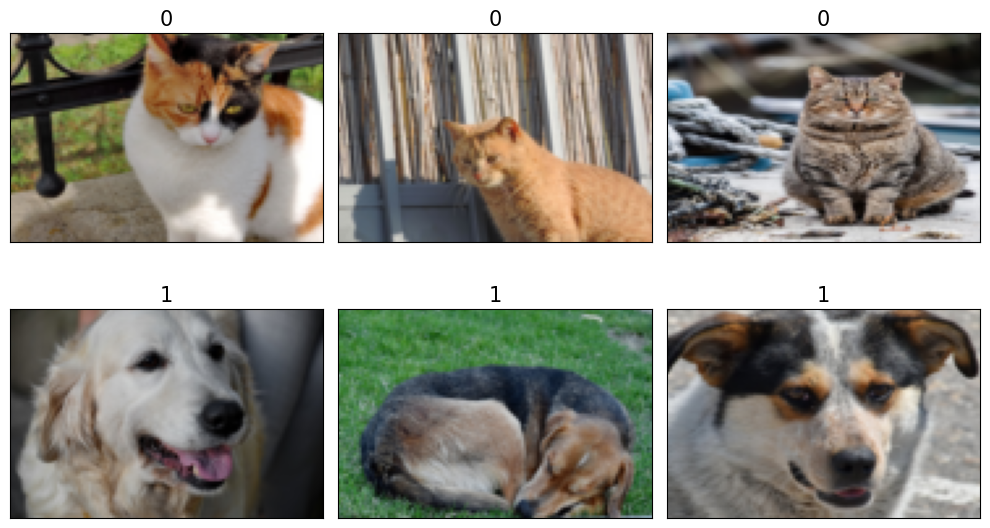

In [37]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()

(<PIL.Image.Image image mode=L size=28x28 at 0x14A2DDBB0>, 5)


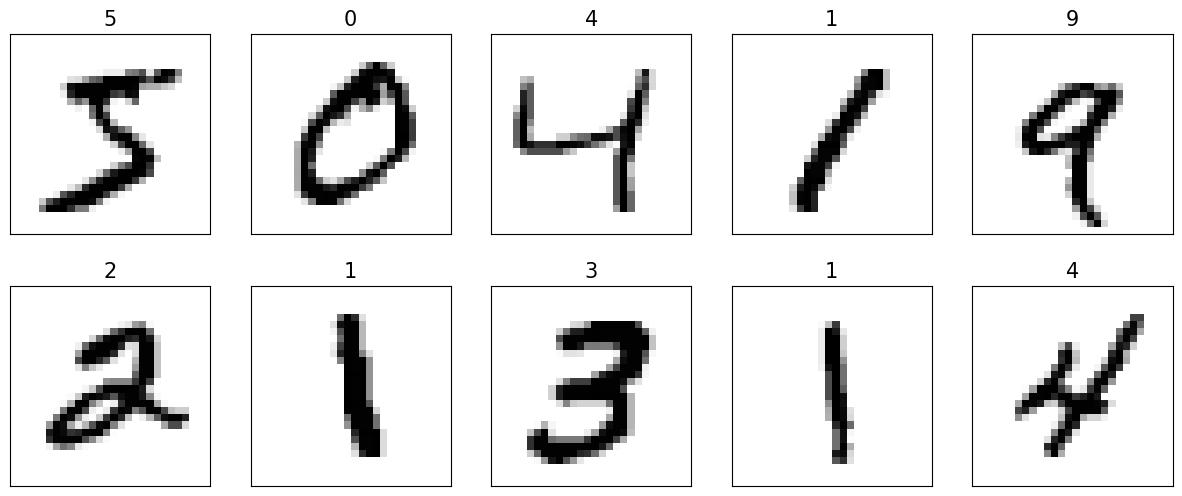

In [41]:
import torchvision
from itertools import islice

image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
    